# Práctico 5 informe

In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
np.set_printoptions(suppress=True,precision=3)
from matplotlib.patches import FancyArrowPatch
from run import load_data, run

### Carga de datos

Explicar dataset 

In [3]:
# Cargamos las preguntas questions y los datos completos data
questions, data = load_data()

## PCA - Principal Component Analysis

El Análisis de componentes principales (O PCA, por sus siglas en inglés) es un mecanismo para reducir las dimensiones de un dataset de $N$ a $n$ ($n < N$), proyectandolo sobre las $n$ más caracaterísticas del mismo. 

Esta reducción genera perdida de información, pero se minimiza por construcción del algoritmo.

## Paso a Paso con el dataset aquienvoto.uy

En esta sección se planea explicar el funcionamiento del algorítmo, con un paso a paso con el dataset que nos compete.

### Centrado en el origen
Como decíamos, la idea final del algoritmo es proyectar sobre las $n$ dimensiones que mejor representan al dataset. En nuestro caso, $n = 2$. 

Para lograr esto, vamos a necesitar utilizar toda nuestra artilleria de álgebra lineal, aplicando una proyección ortogonal sobre las observaciones. Como suele ser usual, la información debe estar centrada a en el origen, por lo restamos la media a cada dimensión.


In [4]:
questions_adjust = questions - questions.mean(axis=0)
print (questions_adjust)

             1        2         3         4         5         6         7  \
19998  0.99097  0.17903 -0.069036  1.490954  1.809566  0.875982 -0.295405   
19999 -0.00903  0.17903  1.930964 -0.509046  0.809566 -0.124018 -1.295405   
20000 -1.00903 -0.82097  0.930964 -0.509046  0.809566 -0.124018 -1.295405   
20001  0.99097  0.17903 -0.069036  1.490954  0.809566 -0.124018 -0.295405   
20002  0.99097  1.17903 -0.069036  0.490954  0.809566  0.875982  1.704595   
20003 -1.00903  1.17903  1.930964 -1.509046  0.809566  0.875982 -2.295405   
20004 -0.00903  1.17903  1.930964 -1.509046 -1.190434  0.875982  0.704595   
20005 -1.00903 -1.82097  1.930964 -0.509046 -0.190434 -2.124018 -2.295405   
20006 -0.00903 -1.82097  1.930964  0.490954  0.809566 -1.124018 -1.295405   
20007 -0.00903  0.17903  1.930964 -0.509046  0.809566 -0.124018 -2.295405   
20008 -2.00903 -1.82097  1.930964 -1.509046  1.809566 -3.124018 -2.295405   
20009  0.99097  0.17903  1.930964  0.490954  0.809566 -0.124018  0.704595   


### Matriz de covarianza 
Calculamos la matriz de covarianza. Dado que nuestra idea es quedarnos con las dimensiones más representativas, tener una medida que relacione el crecimiento de estas, es fundamental.

Recordemos que una covarianza positiva entre dos variables aleatorias $X$ e $Y$ significa que crecen juntas, negativa que crecen inversamente, y 0 es que son independientes.



In [17]:
cvm=np.cov(questions_adjust, rowvar = False)
print('Cantidad de dimensiones que crecen juntos:' + str(len(cvm[cvm > 0])))
print('Cantidad de dimensiones que crecen inversamente:' + str(len(cvm[cvm < 0])))
print('Cantidad de dimensiones independientes:' + str(len(cvm[cvm == 0])))
print (cvm)

Cantidad de dimensiones que crecen juntos:486
Cantidad de dimensiones que crecen inversamente:190
Cantidad de dimensiones independientes:0
[[ 1.554  0.439 -0.334  0.362 -0.18   0.375  0.472  0.258  0.282 -0.092
   0.207  0.335  0.163  0.389  0.38   0.12   0.491 -0.246  0.317  0.468
   0.457  0.416 -0.063  0.418  0.303  0.034]
 [ 0.439  2.087 -0.817  0.538 -0.585  0.978  0.933  0.56   0.469 -0.199
   0.264  0.735  0.437  0.907  0.793  0.314  1.134 -0.522  0.563  1.018
   0.938  0.881 -0.112  0.953  0.573  0.182]
 [-0.334 -0.817  2.315 -0.451  0.854 -0.76  -0.998 -0.59  -0.349  0.523
  -0.125 -0.8   -0.219 -1.068 -0.772 -0.156 -1.234  0.83  -0.659 -1.177
  -1.002 -0.872  0.357 -1.167 -0.738  0.   ]
 [ 0.362  0.538 -0.451  2.076 -0.135  0.475  0.639  0.129  0.348 -0.248
   0.151  0.331  0.127  0.419  0.494  0.086  0.57  -0.169  0.238  0.585
   0.538  0.553 -0.066  0.419  0.354 -0.009]
 [-0.18  -0.585  0.854 -0.135  2.275 -0.447 -0.676 -0.586 -0.015  0.164
   0.081 -0.72  -0.199 -0.886 -0.

### Obtenemos los vectores y valores propios
Queremos obtener las direcciones de mayor varianza, para proyectar sobre ellas. Estas, estaran dadas por los vectores propios con mayor valor propio asociado, los cuales pertenecen a la recta Real por ser la matriz simétrica (Recordemos el Teorema Espectral para Operadores Simétricos).

In [18]:
eig_val_cov, eig_vec_cov = np.linalg.eig(cvm)

for i in range(len(eig_val_cov)):
    eigvec_cov = eig_vec_cov[:,i].reshape(1,26).T

    print('Valor propio {} de la matriz de covarianza {}'.format(i+1, eig_val_cov[i]))
    print('Vector propio:')
    print(eigvec_cov)


Valor propio 1 de la matriz de covarianza 19.062306025668796
Vector propio:
[[-0.092]
 [-0.198]
 [ 0.218]
 [-0.107]
 [ 0.184]
 [-0.186]
 [-0.227]
 [-0.158]
 [-0.092]
 [ 0.036]
 [-0.096]
 [-0.244]
 [-0.088]
 [-0.273]
 [-0.198]
 [-0.064]
 [-0.317]
 [ 0.174]
 [-0.208]
 [-0.306]
 [-0.286]
 [-0.248]
 [ 0.073]
 [-0.297]
 [-0.2  ]
 [-0.02 ]]
Valor propio 2 de la matriz de covarianza 3.3763137295841372
Vector propio:
[[ 0.09 ]
 [ 0.108]
 [ 0.164]
 [ 0.1  ]
 [ 0.325]
 [ 0.15 ]
 [ 0.132]
 [ 0.045]
 [ 0.189]
 [ 0.197]
 [ 0.513]
 [ 0.286]
 [ 0.146]
 [ 0.089]
 [ 0.193]
 [ 0.137]
 [ 0.131]
 [ 0.151]
 [ 0.03 ]
 [-0.228]
 [-0.102]
 [ 0.003]
 [ 0.147]
 [-0.245]
 [-0.322]
 [ 0.053]]
Valor propio 3 de la matriz de covarianza 2.880887862457935
Vector propio:
[[-0.178]
 [-0.296]
 [ 0.194]
 [-0.467]
 [-0.14 ]
 [-0.199]
 [-0.218]
 [ 0.072]
 [-0.188]
 [ 0.315]
 [ 0.244]
 [ 0.352]
 [-0.004]
 [ 0.145]
 [-0.117]
 [-0.022]
 [ 0.056]
 [-0.064]
 [ 0.291]
 [ 0.022]
 [-0.009]
 [-0.144]
 [-0.139]
 [ 0.146]
 [ 0.057]
 

Obtenemos los 2 primeros componentes principales.

In [26]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_val_cov[i]), eig_vec_cov[:,i]) for i in range(len(eig_val_cov))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort()
eig_pairs.reverse()

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Componente principal:' + str(eig_pairs[0][0]))
print('Segundo componente principal:' + str(eig_pairs[1][0]))
for i in eig_pairs:
    print(i)
    
    


Componente principal:19.062306025668796
Segundo componente principal:3.3763137295841372
(19.062306025668796, array([-0.092, -0.198,  0.218, -0.107,  0.184, -0.186, -0.227, -0.158,
       -0.092,  0.036, -0.096, -0.244, -0.088, -0.273, -0.198, -0.064,
       -0.317,  0.174, -0.208, -0.306, -0.286, -0.248,  0.073, -0.297,
       -0.2  , -0.02 ]))
(3.3763137295841372, array([ 0.09 ,  0.108,  0.164,  0.1  ,  0.325,  0.15 ,  0.132,  0.045,
        0.189,  0.197,  0.513,  0.286,  0.146,  0.089,  0.193,  0.137,
        0.131,  0.151,  0.03 , -0.228, -0.102,  0.003,  0.147, -0.245,
       -0.322,  0.053]))
(2.880887862457935, array([-0.178, -0.296,  0.194, -0.467, -0.14 , -0.199, -0.218,  0.072,
       -0.188,  0.315,  0.244,  0.352, -0.004,  0.145, -0.117, -0.022,
        0.056, -0.064,  0.291,  0.022, -0.009, -0.144, -0.139,  0.146,
        0.057, -0.046]))
(2.414772851070287, array([-0.055,  0.064, -0.325, -0.131, -0.192,  0.048,  0.127,  0.07 ,
       -0.011, -0.201, -0.227,  0.227, -0.008

Reduciremos las dimensiones a dos para poder visualizarlo graficamente. Notar que hay un gran salto entre el valor propio asociado al primer componente pricipal y el segundo: 19 vs 3.37. Los que nos puede hacer intuir que es este el realmente determinante.

Construimos una matriz ortogonal con los vectores propios escogidos,que no es más que la asociada a la proyección buscada.



In [28]:
# Nos quedamos con los primeros componentes principales
matrix_w = np.array([eig_pairs[0][1], eig_pairs[1][1]]).T
print('Matrix W:\n', matrix_w)
print('Questions\n', questions_adjust.T)


Matrix W:
 [[-0.092  0.09 ]
 [-0.198  0.108]
 [ 0.218  0.164]
 [-0.107  0.1  ]
 [ 0.184  0.325]
 [-0.186  0.15 ]
 [-0.227  0.132]
 [-0.158  0.045]
 [-0.092  0.189]
 [ 0.036  0.197]
 [-0.096  0.513]
 [-0.244  0.286]
 [-0.088  0.146]
 [-0.273  0.089]
 [-0.198  0.193]
 [-0.064  0.137]
 [-0.317  0.131]
 [ 0.174  0.151]
 [-0.208  0.03 ]
 [-0.306 -0.228]
 [-0.286 -0.102]
 [-0.248  0.003]
 [ 0.073  0.147]
 [-0.297 -0.245]
 [-0.2   -0.322]
 [-0.02   0.053]]
Questions
        19998     19999     20000     20001     20002     20003     20004  \
1   0.990970 -0.009030 -1.009030  0.990970  0.990970 -1.009030 -0.009030   
2   0.179030  0.179030 -0.820970  0.179030  1.179030  1.179030  1.179030   
3  -0.069036  1.930964  0.930964 -0.069036 -0.069036  1.930964  1.930964   
4   1.490954 -0.509046 -0.509046  1.490954  0.490954 -1.509046 -1.509046   
5   1.809566  0.809566  0.809566  0.809566  0.809566  0.809566 -1.190434   
6   0.875982 -0.124018 -0.124018 -0.124018  0.875982  0.875982  0.875982   
7  

### Finalmente, aplicamos la transformación

In [32]:
# Transform instance to the new subspace

transformed = (matrix_w.T @ questions_adjust.T).T
#  We will need the parties and candidates to plot
transformed = pd.concat([transformed, data[['party', 'name']]], axis=1)
print (transformed)

              0         1           party            name
19998  4.613464  1.991521   Frente Amplio  Carolina Cosse
19999  6.138016  0.139201   Frente Amplio  Carolina Cosse
20000  4.929119  0.369417   Frente Amplio  Carolina Cosse
20001  0.776162 -0.130387   Frente Amplio  Carolina Cosse
20002 -1.682122  2.257092   Frente Amplio  Carolina Cosse
20003  4.930124  2.740461   Frente Amplio  Carolina Cosse
20004  0.403669  1.257157   Frente Amplio  Carolina Cosse
20005  6.764036 -1.345406   Frente Amplio  Carolina Cosse
20006  3.078530  1.034450   Frente Amplio  Carolina Cosse
20007  5.909485  0.443453   Frente Amplio  Carolina Cosse
20008  6.886501 -0.305277   Frente Amplio  Carolina Cosse
20009  0.910870  3.231904   Frente Amplio  Carolina Cosse
20010  1.430585 -1.261656   Frente Amplio  Carolina Cosse
20011  2.391977 -0.425406   Frente Amplio  Carolina Cosse
20012  3.559000 -0.809153   Frente Amplio  Carolina Cosse
20013  8.137785 -0.726321   Frente Amplio  Carolina Cosse
20014  6.15327

Nos hemos quedado con las dos dimensiones más representativas, perdiendo la menor cantidad de información posible.

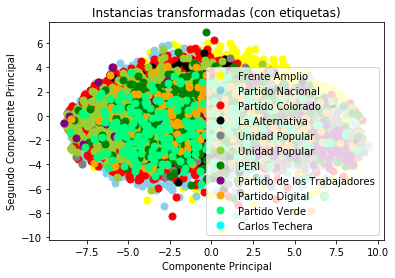

In [37]:
num_instances = len(transformed.index)
plt.plot(transformed[transformed['party'] == 'Frente Amplio'].iloc[:,0],transformed[transformed['party'] == 'Frente Amplio'].iloc[:,1], 'o', markersize=7, color='yellow', alpha=1, label='Frente Amplio')
plt.plot(transformed[transformed['party'] == 'Partido Nacional'].iloc[:,0],transformed[transformed['party'] == 'Partido Nacional'].iloc[:,1], 'o', markersize=7, color='skyblue', alpha=1, label='Partido Nacional')
plt.plot(transformed[transformed['party'] == 'Partido Colorado'].iloc[:,0],transformed[transformed['party'] == 'Partido Colorado'].iloc[:,1], 'o', markersize=7, color='red', alpha=1, label='Partido Colorado')
plt.plot(transformed[transformed['party'] == 'La Alternativa'].iloc[:,0],transformed[transformed['party'] == 'La Alternativa'].iloc[:,1], 'o', markersize=7, color='black', alpha=1, label='La Alternativa')
plt.plot(transformed[transformed['party'] == 'Unidad Popular'].iloc[:,0],transformed[transformed['party'] == 'Unidad Popular'].iloc[:,1], 'o', markersize=7, color='grey', alpha=1, label='Unidad Popular')
plt.plot(transformed[transformed['party'] == 'Partido de la Gente'].iloc[:,0],transformed[transformed['party'] == 'Partido de la Gente'].iloc[:,1], 'o', markersize=7, color='yellowgreen', alpha=1, label='Unidad Popular')
plt.plot(transformed[transformed['party'] == 'PERI'].iloc[:,0],transformed[transformed['party'] == 'PERI'].iloc[:,1], 'o', markersize=7, color='green', alpha=1, label='PERI')
plt.plot(transformed[transformed['party'] == 'Partido de los Trabajadores'].iloc[:,0],transformed[transformed['party'] == 'Partido de los Trabajadores'].iloc[:,1], 'o', markersize=7, color='purple', alpha=1, label='Partido de los Trabajadores')
plt.plot(transformed[transformed['party'] == 'Partido Digital'].iloc[:,0],transformed[transformed['party'] == 'Partido Digital'].iloc[:,1], 'o', markersize=7, color='orange', alpha=1, label='Partido Digital')
plt.plot(transformed[transformed['party'] == 'Partido Verde'].iloc[:,0],transformed[transformed['party'] == 'Partido Verde'].iloc[:,1], 'o', markersize=7, color='springgreen', alpha=1, label='Partido Verde')
plt.plot(transformed[transformed['party'] == 'Carlos Techera'].iloc[:,0],transformed[transformed['party'] == 'Carlos Techera'].iloc[:,1], 'o', markersize=7, color='cyan', alpha=1, label='Carlos Techera')
#plt.xlim([-4,4])
#plt.ylim([-4,4])
plt.xlabel('Componente Principal')
plt.ylabel('Segundo Componente Principal')
plt.legend()
plt.title('Instancias transformadas (con etiquetas)')

plt.show()



### Conclusiones

Se aprecia un conjunto muy poco disperso, y sin patrones destacables, lo que da a entender que la información brindada por las preguntas no agrupa bien a los partidos

Notar que tenemos un componente principal de valor propio 19, más de 6 veces las segunda dimensión más destacada. Esto nos hace pensar que tomando esta dimensión, la perdida de información fue insignificante, por lo que aún manteniendo todos los datos, el resultado no sería mucho mejor.

Por último, todo esto nos hace considerar que se hizo una mala elección de preguntas, con la mayoria de ellas irrelevantes, recayendo el mayor aporte a la varianza en unas pocas.

## KMeans

KMeans es un método de aprendizaje no supervisado, más específicamente de clustering. Funciona creando $k$ clusters de elementos con medias similares.
En este caso lo que hacemos es primero dada la cantidad total de clusters, definimos un centroide para cada uno. Cada centroid es inicializado como un vector de dimensión 27, con valores aleatorios entre 1 y 5, esto es para reflejar las posibles que respuestas que varían entre dicho rango.

Luego de inicializados los centroides se pasa a iterar entre los datos de entrada, calculando la distancia entre la entrada y un centroide dado. Luego se agrega la entrada al cluster, para el cual la distancia calculada sea la menor.
Esto se realiza para cada entrada del dataset.
Este proceso se repite hasta que los clusters no cambien, es decir, que ningún elemento se cambie de cluster.



In [7]:
# Importaciones para kmeans
import datetime
import pandas as pd
from time import time
from src.kmeans import KMeans
from sklearn.metrics import pairwise_distances, adjusted_rand_score, silhouette_score
from run import load_data

party_map = {
        'Frente Amplio': 0,
        'Partido Nacional': 1,
        'Partido Colorado': 2,
        'La Alternativa': 3,
        'Unidad Popular': 4,
        'Partido de la Gente': 5,
        'PERI': 6,
        'Partido de los Trabajadores': 7,
        'Partido Digital': 8,
        'Partido Verde': 9,
        'Partido de Todos': 10
}

In [11]:
start_time = time()
data, full_data = load_data()
numeric_parties  = full_data.party.map(party_map)
cluster_size = [2,3,5,10,11]
for size in cluster_size:
    kmeans = KMeans(data, cluster_count=size)
    kmeans.train()
    result = silhouette_score(data, kmeans.data_cluster_idx, metric='euclidean')
    ari = adjusted_rand_score(numeric_parties, kmeans.data_cluster_idx)
    elapsed_time = time() - start_time
    print(f'----------------------------------------')
    print(f'###### CLUSTER SIZE: {size} ######')
    print(f'###### SILHOUETTE SCORE: {result} ######')
    print(f'###### ARI SCORE: {ari} ######')
    print(f'----------------------------------------')

print(f'TOTAL TIME: {datetime.timedelta(seconds=elapsed_time)}')

----------------------------------------
###### CLUSTER SIZE: 2 ######
###### SILHOUETTE SCORE: 0.20180703903979927 ######
###### ARI SCORE: 0.24600101548396386 ######
----------------------------------------
----------------------------------------
###### CLUSTER SIZE: 3 ######
###### SILHOUETTE SCORE: 0.13519823633768993 ######
###### ARI SCORE: 0.30336634207896884 ######
----------------------------------------
----------------------------------------
###### CLUSTER SIZE: 5 ######
###### SILHOUETTE SCORE: 0.09191969684106444 ######
###### ARI SCORE: 0.2633394207265371 ######
----------------------------------------
----------------------------------------
###### CLUSTER SIZE: 10 ######
###### SILHOUETTE SCORE: 0.05326564180942036 ######
###### ARI SCORE: 0.1643724658833603 ######
----------------------------------------
----------------------------------------
###### CLUSTER SIZE: 11 ######
###### SILHOUETTE SCORE: 0.041194302532742436 ######
###### ARI SCORE: 0.12890400296207954 ##

### Análisis

#### Silhouette
El resultado del índice de silhouette esta acotado entre [-1, 1]. El -1 representa un agrupamiento incorrecto mientras que el +1 representa un agrupamiento extremadamente denso. Resultados rondando el 0 indican solapamiento de clusters.
El puntaje es más alto cuando los clusters son densos y están bien separados, que refleja el concepto de un cluster.

Como se puede ver por la ejecución del agoritmo y el resultado del índice, el agrupamiento se deteriora mientras aumenta la cantidad de clusters. Entonces los datos no están agrupados ni tienen una agrupación predilecta. Basado en esa observación, pensamos que los datos no tienen mucho relacionamiento entre sí, ya que mientras más granular la agrupación peor se torna.

#### ARI
El ARI es una función que mide la similaridad entre dos asignaciones (etiquetado), una siendo las asignación real de los datos y la otra siendo la asignación que les da el algoritmo.

El resultado del ARI esta acotado entre [-1, 1]. El -1 representa un etiquetamiento incorrecto mientras que el +1 representa un etiquetamiento perfecto.

Al igual que con el índice de silhouette, mientras más clusters peor es el rendimiento del algoritmo. Esto como ya comentamos se puede deber a que los datos no están necesariamente agrupados, por ende la asignación tiende a deteriorarse cuando se quiere tratar de dividir en grupos más específicos.

### Conclusiones
Dados los resultados del algoritmo y ambos índices creemos que las respuestas de los usuarios no presentan una agrupación densa ni específica. Por ende, las respuestas de los usuarios a las preguntas no reflejan necesariamente una relación con candidatos y/o partidos políticos. Esto significa que las predicciones que se harán en base a dichos datos no serán muy buenas.